<a href="https://colab.research.google.com/github/arpedrig/UTA-PG-DataScience/blob/main/Final_EDA_Foodhub_Arnold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the required libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Understanding the structure of the data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/GreatLearning/Foodhub Project/foodhub_order.csv') ## Fill the blank to read the data
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Question 1: How many rows and columns are present in the data?**

In [ ]:
# Check the shape of the dataset
df.shape

(1898, 9)

**Question 2: What are the datatypes of the different columns in the dataset?**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method.**

In [ ]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Answer: There are no missing values in this dataset.**

**Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?** 

In [ ]:
# Get the summary statistics of the numerical data
df.describe().round(2) # Print the statistical summary of the data 
#t['food_preparation_time'].reset_index()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.00,1898.00,1898.00,1898.00,1898.00
mean,1477495.50,171168.48,16.50,27.37,24.16
std,548.05,113698.14,7.48,4.63,4.97
min,1476547.00,1311.00,4.47,20.00,15.00
25%,1477021.25,77787.75,12.08,23.00,20.00
50%,1477495.50,128600.00,14.14,27.00,25.00
75%,1477969.75,270525.00,22.30,31.00,28.00
max,1478444.00,405334.00,35.41,35.00,33.00


**Food Delivery Time (min):**
Minimum = 20
Median = 27.37
Max = 35


**Question 5: How many orders are not rated?**



In [ ]:
#Question 5: How many orders are not rated? 
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#Exploratory Data Analysis (EDA)
#Univariate Analysis# 

**Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)**

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

In [ ]:
# check unique customer ID
df['customer_id'].nunique()

1200

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  #Unique Restaurant Name

178

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique() #Number of  unique cuisine type


14

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

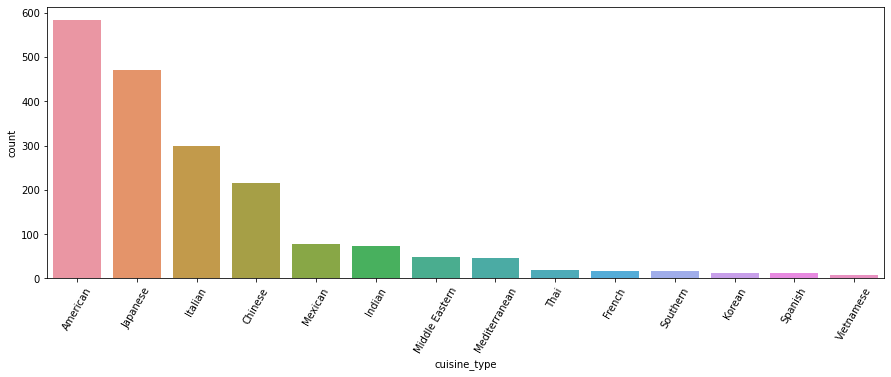

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type',order=df['cuisine_type'].value_counts().index) ## Create a countplot for cuisine type.
plt.xticks(rotation = 60)

In [ ]:
df[df['day_of_the_week']=='Weekend']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22
...,...,...,...,...,...,...,...,...,...
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


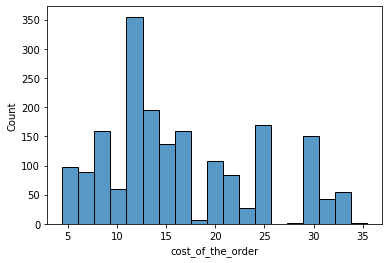

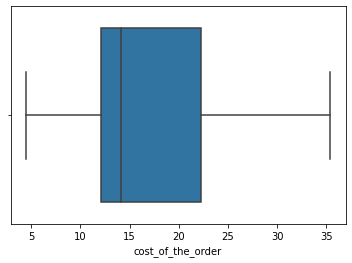

In [ ]:
#Cost of the Order
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

In [ ]:
# # Check the unique values
df['day_of_the_week'].nunique() ## Complete the code to check unique values for the 'day_of_the_week' column

2

In [ ]:
df_rated = df[df['rating']!='Not Given'].sum()
df_rated

order_id                                                        2804286459
customer_id                                                      324877772
restaurant_name          HangawiBlue Ribbon Sushi IzakayaCafe HabanaBlu...
cuisine_type             KoreanJapaneseMexicanAmericanAmericanIndianIta...
cost_of_the_order                                                 31314.82
day_of_the_week          WeekendWeekendWeekdayWeekendWeekdayWeekdayWeek...
rating                   Not givenNot given5343Not given355Not given553...
food_preparation_time                                                51952
delivery_time                                                        45859
Revenue                                                           6166.303
total_time                                                           97811
dtype: object

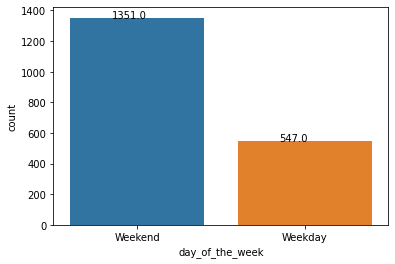

In [ ]:
ax=sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column
df.groupby(['day_of_the_week'])['day_of_the_week'].count()
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+.01))
plt.show();

In [ ]:
# Check the unique values
df['rating'].nunique() ## Complete the code to check unique values for the 'rating' column

4

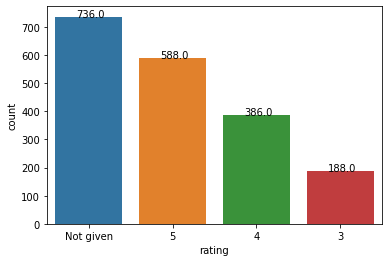

In [ ]:
ax=sns.countplot(data = df, x = 'rating',order=df['rating'].value_counts().index) ## Complete the code to plot bar graph for 'rating' column
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+.01))
plt.show()

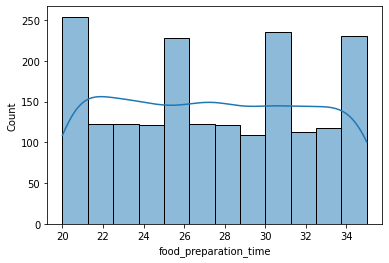

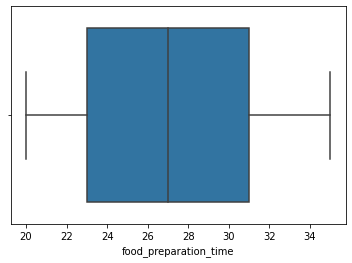

In [ ]:
sns.histplot(data=df,x='food_preparation_time',kde=True) ## Complete the code to plot the histogram for the cost of order
plt.show()

sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()

In [ ]:
df['food_preparation_time'].head(50)

0     25
1     25
2     23
3     25
4     25
5     20
6     28
7     33
8     21
9     29
10    34
11    23
12    23
13    24
14    23
15    33
16    30
17    21
18    25
19    35
20    21
21    25
22    21
23    33
24    32
25    20
26    24
27    24
28    21
29    20
30    28
31    35
32    35
33    34
34    30
35    32
36    23
37    31
38    20
39    27
40    21
41    23
42    22
43    33
44    30
45    29
46    22
47    34
48    27
49    33
Name: food_preparation_time, dtype: int64

In [ ]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

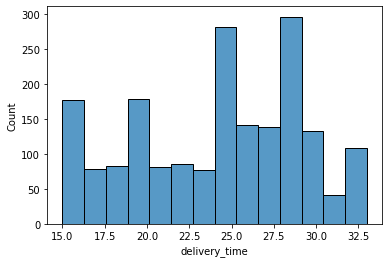

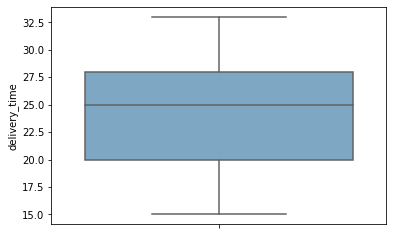

In [ ]:
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,y='delivery_time',palette = 'PuBu') ## Complete the code to plot the boxplot for the delivery time
plt.xticks(rotation = 60)
plt.show()

**Question 7: Which are the top 5 restaurants in terms of the number of orders received?**

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(10)


Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64


**Question 8: Which is the most popular cuisine on weekends?**



In [ ]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].nunique() ## Complete the code to check unique values for the cuisine type on weekend
df_weekend[['cuisine_type']].value_counts(normalize=False).reset_index()

,cuisine_type,0
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53
5,Indian,49
6,Mediterranean,32
7,Middle Eastern,32
8,Thai,15
9,French,13


**Question 9: What percentage of the orders cost more than 20 dollars?**


In [ ]:
#Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

#Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

#Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


**Question 10: What is the mean order delivery time?**




In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


**Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.**

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)  ## Write the appropriate column name to get the top 5 cmost frequent customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

# Multivariate Analysis 

**Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)** 

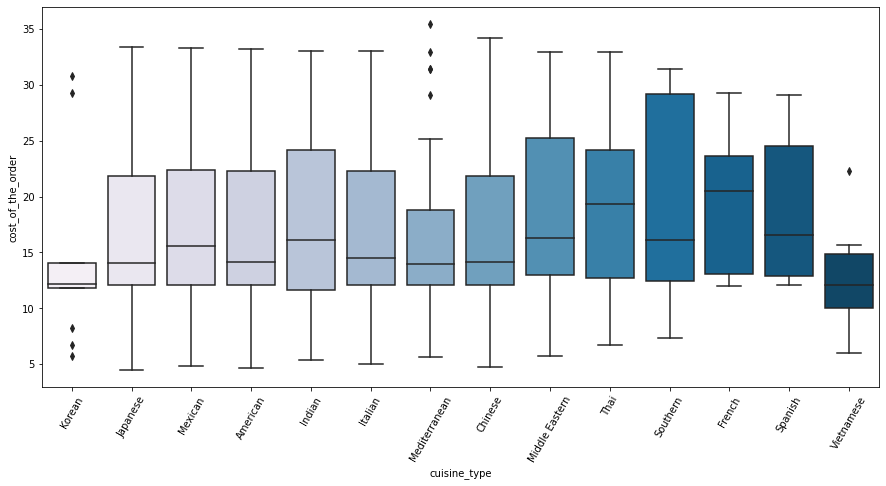

In [ ]:
#Cuisine vs Cost of the order
#
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

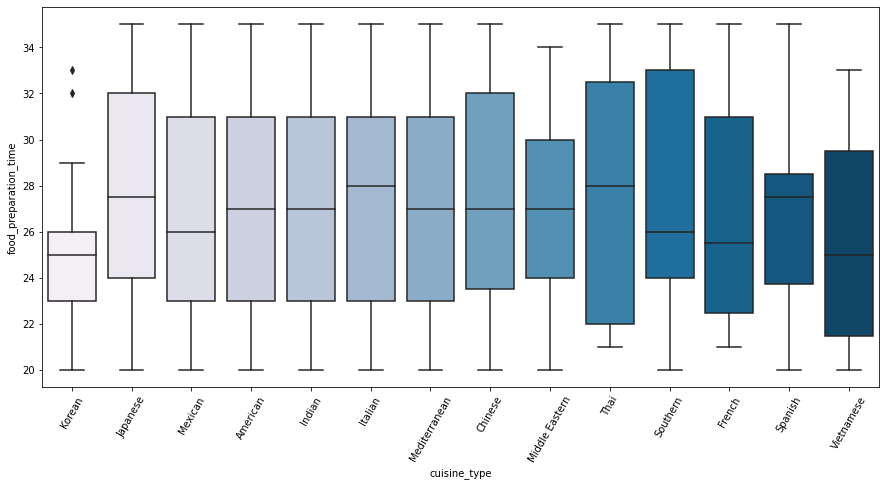

In [ ]:
#Cuisine vs. Food Preparation Time
#
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df,palette = 'PuBu' )  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

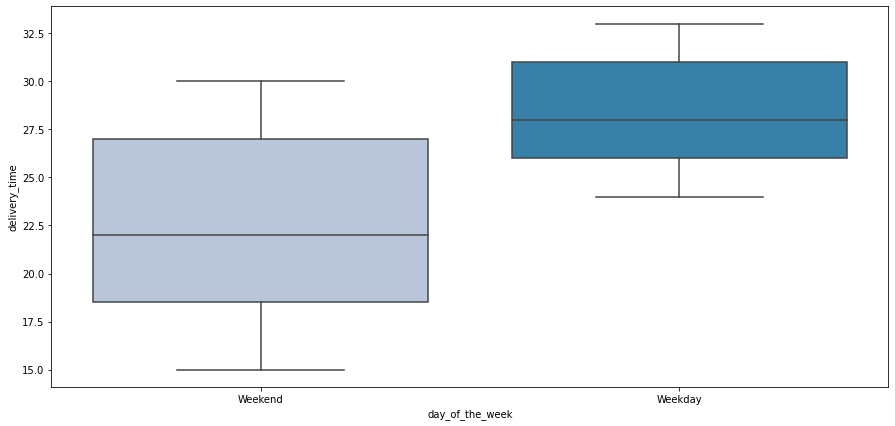

In [ ]:
# Day of the Week vs. Delivery Time
#
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df,palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

In [ ]:
dtime=df[df['day_of_the_week']=='Weekday']
dtime['delivery_time'].describe().round(2)

count    547.00
mean      28.34
std        2.89
min       24.00
25%       26.00
50%       28.00
75%       31.00
max       33.00
Name: delivery_time, dtype: float64

In [ ]:
#
#Run the below code and write your observations on the revenue generated by the restaurants.
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).reset_index().head(14)

,restaurant_name,cost_of_the_order
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76
5,RedFarm Broadway,965.13
6,RedFarm Hudson,921.21
7,TAO,834.50
8,Han Dynasty,755.29
9,Blue Ribbon Sushi Bar & Grill,666.62


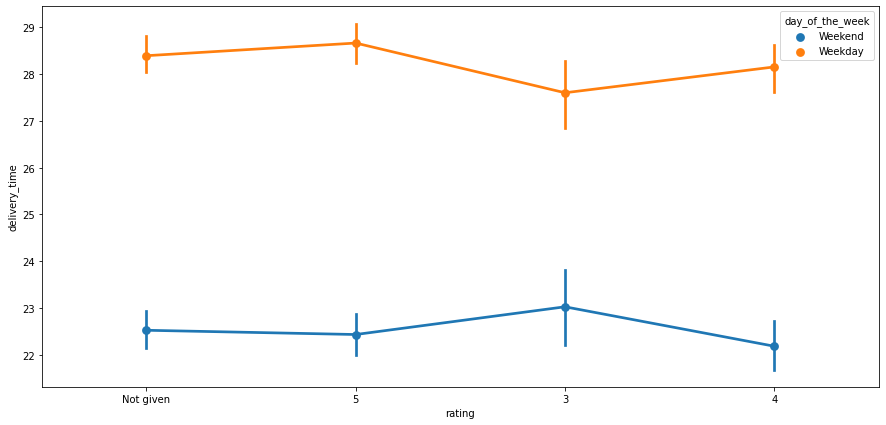

In [ ]:
# Rating vs. Delivery Time
from numpy import median
plt.figure(figsize=(15,7))
sns.pointplot(x='rating', y='delivery_time', hue='day_of_the_week',data=df)  
plt.show()

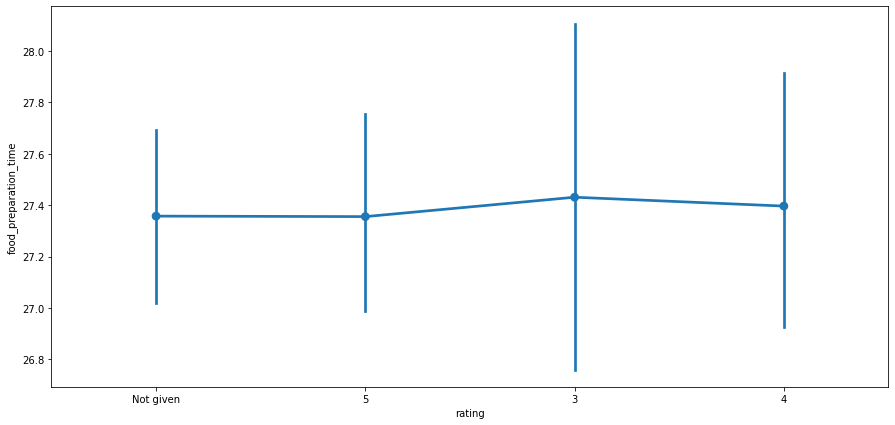

In [ ]:
#Rating vs. Food Preparation Time
plt.figure(figsize=(15,7))
sns.pointplot(x='rating', y='food_preparation_time',data=df)  
plt.show()

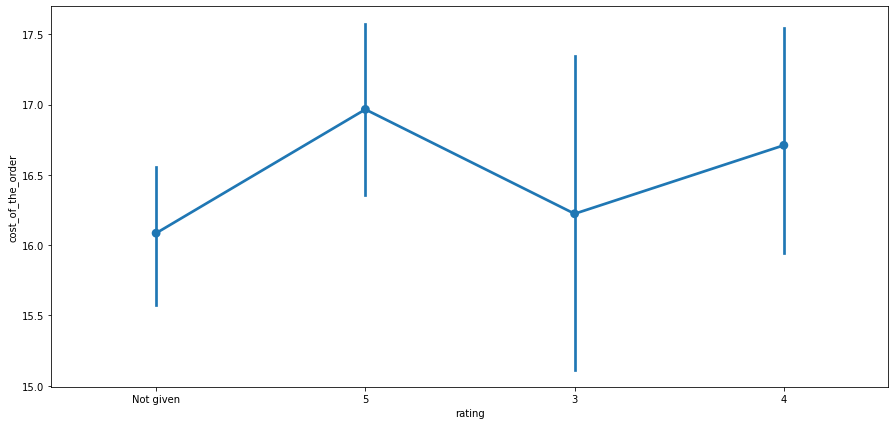

In [ ]:
#Rating vs. Cost of the Order
plt.figure(figsize=(15,7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df)  
plt.show()

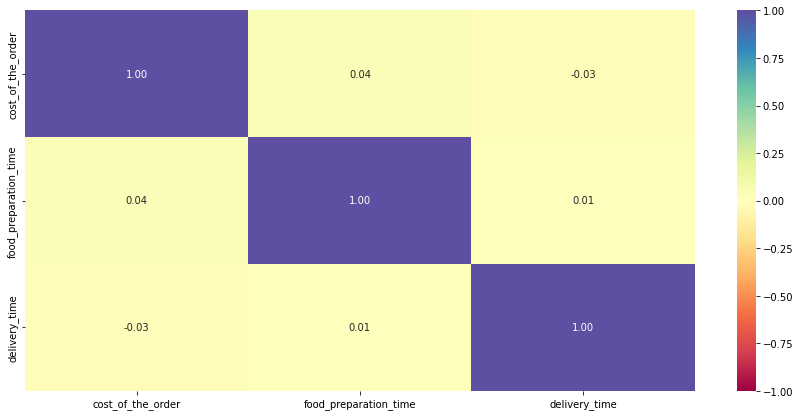

In [ ]:
#Correlation among the variables
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.**

In [ ]:
#df.groupby(['restaurant_name'])['rating'].agg(['count','mean'])
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count[df_rating_count['rating']>50]


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

#df_mean_4

# Group the restaurant names with their ratings and find the mean rating of each restaurant
#df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

grp=df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index() ## Complete the code to find the mean rating
grp[grp['rating']>4]


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


**Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.**

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df[['restaurant_name','Revenue']].head()

,restaurant_name,Revenue
0,Hangawi,7.6875
1,Blue Ribbon Sushi Izakaya,1.8120
2,Cafe Habana,1.8345
3,Blue Ribbon Fried Chicken,7.3000
4,Dirty Bird to Go,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')


The net revenue is around 6166.3 dollars


**Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)**

In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

df_time_greater_than_60 = df[df['total_time']>60] 

print('The number of total orders with total time > 60 is:', df_time_greater_than_60.shape[0])

#Calculate percentage of such orders in the dataset
percentage = (df_time_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 60 minutes:", round(percentage, 2), '%')

The number of total orders with total time > 60 is: 200
Percentage of orders above 60 minutes: 10.54 %


**Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?**

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes
